In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
rng = np.random.default_rng()

# **Data Generation & Weights Initialization**

In [ ]:
n = 100
X = rng.uniform(1, 10, size = n).reshape((-1, 1))
y = X + rng.normal(0, 2, n).reshape((-1, 1))
X = np.hstack((np.ones(shape = (X.shape[0], 1)), X)) # Add an intercept column to X
#p = rng.permutation(len(X)) # Shuffle X, and y in unison
#X, y = X[p], y[p]
w = rng.uniform(low = -0.1, high = 0.1, size = X.shape[1]).reshape((-1, 1)) # Initialize weights randomly [0, 1)
w_old = w.copy()
print('X:', X.shape, 'y',  y.shape, 'w:', w.shape) # Sanity check

X: (100, 2) y (100, 1) w: (2, 1)


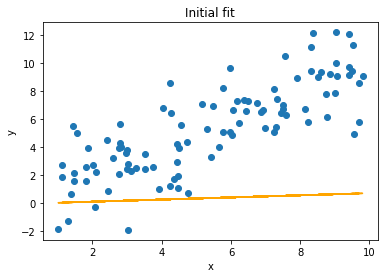

Initial weights: [-0.05810262] [0.07604071]


In [ ]:
ys = X@w
plt.xlabel('x'), plt.ylabel('y'), plt.title('Initial fit')
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], ys, 'orange')
plt.show()
print('Initial weights:', *w)

# **Stochastic Gradient Descent**

In [ ]:
# Learning rate
eta = 0.0001
loss_history = []
w_history = w.copy()
converged = False
epoch = 1
itr = 1
current_streak = 0
previous_loss = 0

while not converged and itr < 10000:        
    p = rng.permutation(len(X)) # Shuffle X, and y in unison
    X, y = X[p], y[p]
    
    for xi, yi in zip(X, y):
        # Calculate an estimate
        y_hat = np.dot(xi, w)
        
        # Calculate the Loss as the Gradient
        d = (y_hat - yi)
        L = d**2
        loss_history.append(L)
        dL = 2*xi*d

        # Update the weights
        w -= (eta*dL).reshape((w.shape[0], -1))
        # whist
        w_history = np.hstack((w_history, w))
        itr += 1

        delta = np.abs(previous_loss - L)
        if delta < 1: current_streak += 1
        else: current_streak = 0
        previous_loss = delta
        mse = np.mean(loss_history)

        if current_streak > 5: 
            print(f'Converged at Epoch {epoch}, Iteration {itr}.')
            w_history = w_history[:, 1:].T
            converged = True
            break

    print(f'Epoch: {epoch} - MSE: {np.around(mse, decimals=3)}')
    epoch += 1

Epoch: 1 - MSE: 25.787
Epoch: 2 - MSE: 16.91
Epoch: 3 - MSE: 12.831
Epoch: 4 - MSE: 10.635
Epoch: 5 - MSE: 9.295
Epoch: 6 - MSE: 8.399
Epoch: 7 - MSE: 7.757
Epoch: 8 - MSE: 7.276
Epoch: 9 - MSE: 6.902
Epoch: 10 - MSE: 6.602
Epoch: 11 - MSE: 6.357
Epoch: 12 - MSE: 6.152
Epoch: 13 - MSE: 5.979
Epoch: 14 - MSE: 5.831
Epoch: 15 - MSE: 5.702
Epoch: 16 - MSE: 5.59
Epoch: 17 - MSE: 5.49
Epoch: 18 - MSE: 5.402
Epoch: 19 - MSE: 5.322
Epoch: 20 - MSE: 5.251
Epoch: 21 - MSE: 5.186
Epoch: 22 - MSE: 5.128
Epoch: 23 - MSE: 5.074
Epoch: 24 - MSE: 5.025
Epoch: 25 - MSE: 4.98
Epoch: 26 - MSE: 4.938
Epoch: 27 - MSE: 4.899
Epoch: 28 - MSE: 4.864
Epoch: 29 - MSE: 4.83
Epoch: 30 - MSE: 4.799
Epoch: 31 - MSE: 4.769
Epoch: 32 - MSE: 4.742
Epoch: 33 - MSE: 4.716
Epoch: 34 - MSE: 4.692
Epoch: 35 - MSE: 4.669
Epoch: 36 - MSE: 4.647
Epoch: 37 - MSE: 4.626
Epoch: 38 - MSE: 4.607
Converged at Epoch 39, Iteration 3813.
Epoch: 39 - MSE: 4.597


# **Inital Weights vs Optimized Weights**

In [ ]:
print('Initial weights:', *w_old)
print('Updated weights:', *w)

Initial weights: [0.04204831] [-0.09885004]
Updated weights: [0.08442691] [0.9346237]


# **Visualizations**

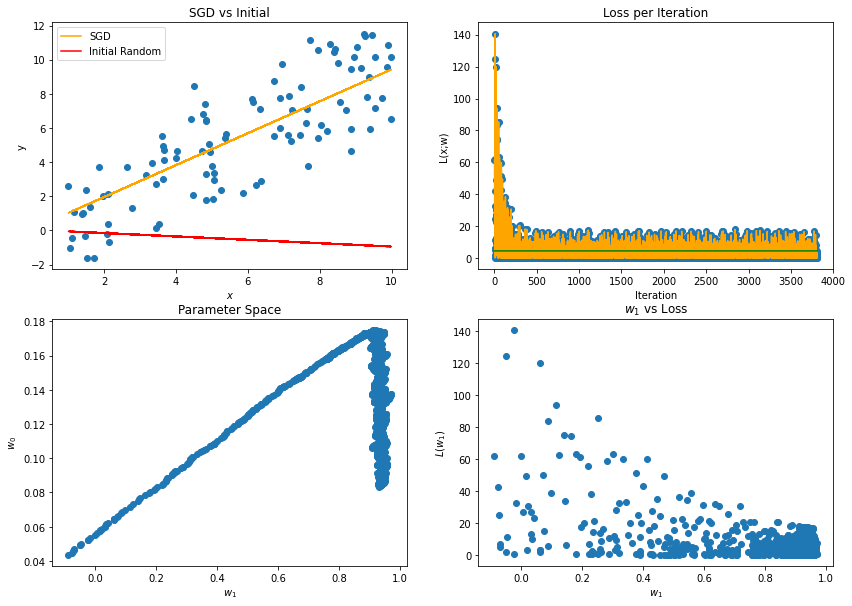

In [ ]:
figure, axis = plt.subplots(2, 2, figsize=(14,10))

# Calculate the y values for the new weights verus the old weights.
y_curr, y_init = X@w, X@w_old
#axis[0].xlabel('x'), axis[0].ylabel('y')
axis[0,0].set_title('SGD vs Initial')
axis[0,0].scatter(X[:, 1], y)
sgd_line, random_line = axis[0,0].plot(X[:, 1], y_curr, 'orange', label = 'SGD'), axis[0,0].plot(X[:, 1], y_init, 'red', label = 'Initial Random')
axis[0,0].set(xlabel=r"$x$", ylabel=r"y")
axis[0,0].legend(loc = 'best')


#axis[1].xlabel('Iter'), axis[1].ylabel('L(w)')
axis[0,1].set_title('Loss per Iteration')
axis[0,1].scatter(np.arange(len(loss_history)) + 1, loss_history)
axis[0,1].plot(np.arange(len(loss_history)) + 1, loss_history, 'orange')
axis[0,1].plot(np.arange(len(loss_history)) + 1, np.mean(loss_history)*np.ones(len(loss_history)), 'green')
axis[0,1].set(xlabel="Iteration", ylabel=r"L(x;w)")

# TODO: Color code the parameter data by given their epoch
axis[1,0].set_title('Parameter Space')
axis[1,0].scatter(w_history[:, 1], w_history[:, 0])
axis[1,0].set(xlabel=r"$w_1$", ylabel=r"$w_0$")

#axis[2].xlabel(r'$w_1$'), axis[2].ylabel('L(w)')
axis[1,1].set_title(r'$w_1$ vs Loss')
axis[1,1].scatter(w_history[:, 1], loss_history)
axis[1,1].set(xlabel=r"$w_1$", ylabel=r"$L(w_1)$")
plt.show()

In [ ]:
print

# **Insights from Visual Inference and Loss Evaluation**
*   If the loss function goes off to infinity (+$\infty$, -$\infty$) your learning rate is too high.
*   The learning rate and the number of samples/data you will need are inversely proportional with regards to finding an optimum/convergence. If we want to set our learning rate, $\eta$ low for the sake of stability and accuracy, we must have a proportionally larger set of sample data otherwise our model will drastically underfit (unless we get lucky with random weight, which is not practically reliable).  
*  If our loss seems to be oscilating (well above the mean loss) over a large number of iterations, the learning rate is probably too high.
*  Gradient Descent is super sensitive to features with even relatively moderate differences in magnitude. You should be keenly aware of feature scaling.



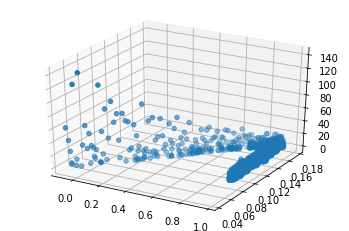

In [ ]:
u = w_history[:, 1].flatten()
v = w_history[:, 0].flatten()
w = loss_history
ax = plt.axes(projection="3d")
ax.scatter3D(u, v, w)
plt.show()